# Diagnostic Reference Level for Radiopharmaceuticals in NM- INC 

Elaborado por: Andrea Lizeth Lopez Rodriguez.Universidad Nacional de Colombia 
Dirigida por: MSc. Nathaly Barbosa Parada. Instituto Nacional de Cancerología


Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


##Archivo plano de texto, colocar los datos y los encabezados sin espacios 
#Para cargar los datos de actividades y volumenes
data = pd.read_csv('DRLRF.txt', delim_whitespace =True)

#Para cargar los datos de Unidosis RF- INC: Enero 2019- Diciembre 2019
dat = pd.read_csv('UNIRF.txt', delim_whitespace =True)

#para ver los primeros datos
#dat.head()

In [2]:
sns.set_context("talk",font_scale=1.4)

In [3]:
from scipy import stats

donde ActAdm -> Actividad Administrada y Actdosi -> Actividad dosificada en mCi. Vol -> Volumen en mL

In [4]:
##lista de tipos de datos por cada columna
dat.dtypes

DIA          int64
MES         object
RF          object
EXAM        object
Actdosi    float64
dtype: object

## Variables Categóricas

In [5]:
######Conteo de variables categoricas
####GROUP BY in Python 
data_test =dat[['RF','EXAM']]
dat["RF"].value_counts()

Tc    6201
F     1226
I      359
Ga     293
Lu      46
Ra       3
Name: RF, dtype: int64

In [6]:
#data_test

In [7]:
#sns.countplot(y="RF", data=dat,orient="h",color="c")

In [8]:
######Conteo de variables categoricas
dat["EXAM"].value_counts()

OSEA         2781
VENTRI       1548
DTPA         1430
FDG          1226
YODO          354
NANO          261
GADOTA        155
GAPSMA        138
MAA            52
NANOMAA        48
LUDOTATOC      46
DMSA           36
MIBI           27
HYNICTOC       16
MIBG            5
RADIO           3
ETILEN          1
IDA             1
Name: EXAM, dtype: int64

In [9]:
#sns.countplot(y="EXAM", data=dat,orient="h",color="c")

In [10]:
### Terapia 
listaTER= ((dat['RF']=='Ra') | (dat['RF']=='Lu') | (dat['RF']=='I'))
dTER = dat[listaTER]

In [11]:
##### Diagnóstico
listaPET= ((dat['RF']=='F') | (dat['RF']=='Ga'))
listaTC= dat['RF']=='Tc'
listad=((dat['RF']=='Tc')|(dat['RF']=='F') | (dat['RF']=='Ga'))
dd=dat[listad]
dPET = dat[listaPET]
dTC = dat[listaTC]
#lista

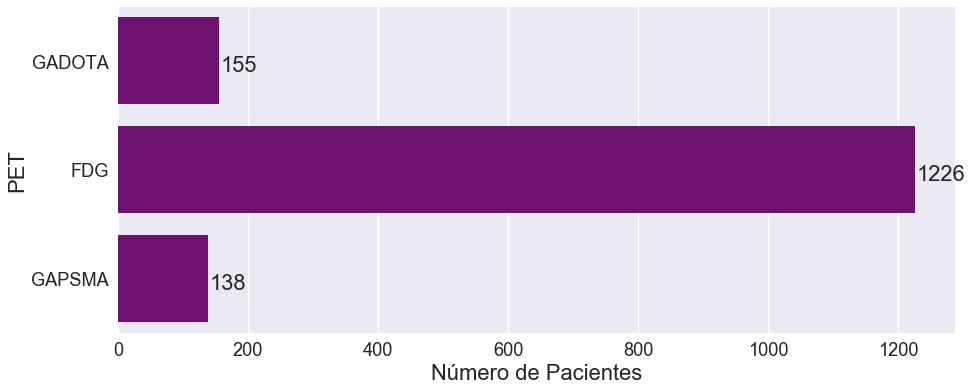

In [12]:
plt.figure(figsize=(15,6))
##Tecnecio
#axy=sns.countplot(y="EXAM", data=dTC,orient="h",color="purple")
##Fluor 
axy=sns.countplot(y="EXAM", data=dPET,orient="h",color="purple")
#plt.title('Medicina Nuclear 2019')
#plt.ylabel('Tecneciados',fontsize=22)
plt.ylabel('PET',fontsize=22)
plt.xlabel('Número de Pacientes',fontsize=22)

for p in axy.patches:
    axy.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+2, p.get_y()+0.5))

#plt.yticks(np.arange(3), ['Ga-68 DOTA', 'F-18 FDG','Ga-68 PSMA'])      
###con data=df  -PET  
#plt.savefig('examPET.pdf')

####con data=df1 -Terapias
#plt.savefig('examTER.pdf')

#for p in axy.patches:
        #axy.annotate('{:.0f}'.format(p.get_height()), (p.get_height()+50, p.get_x()+0.5))

#plt.savefig('examTC.pdf')
plt.savefig('examPET.pdf')

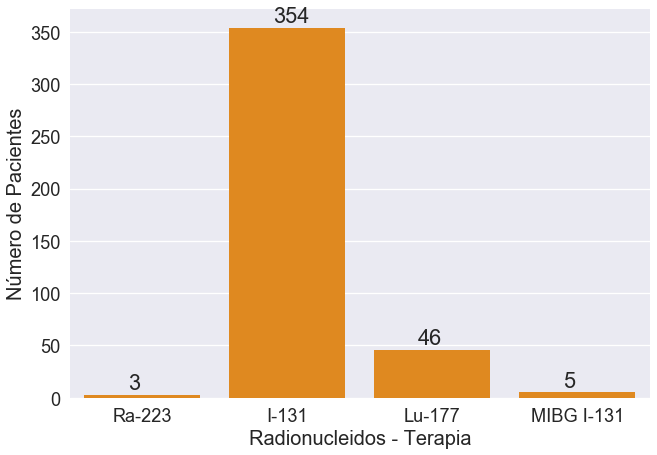

In [13]:
#axx=sns.countplot(x="RF", data=dd,orient="h",color="purple")
axx=sns.countplot(x="EXAM", data=dTER,orient="h",color="darkorange")
#plt.title('Medicina Nuclear 2019')
#plt.xlabel('Radionucleidos - Diagnóstico')
plt.xlabel('Radionucleidos - Terapia')
plt.ylabel('Número de Pacientes')

#for p in axx.patches:
        #axx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
for p in axx.patches:
        axx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+5)) 
        
#plt.xticks(np.arange(3), ['Tc-99m', 'Ga-68', 'F-18'])   
plt.xticks(np.arange(4), ['Ra-223', 'I-131', 'Lu-177','MIBG I-131'])  
#plt.savefig('RND.pdf')
plt.savefig('RNTER.pdf')

In [14]:
#plt.figure(figsize=(12,8))
#sns.countplot(data=df, x="MES", hue="RF")

In [15]:
##########  Agrupando por examen #########
dat_group_exam = dat.groupby(['EXAM'],as_index=False)

## $\color{red}{\text{TECNECIO}}$

In [16]:
TC=dat_group_exam.get_group('OSEA')

In [17]:
TC['Actdosi'].max()

25.0

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


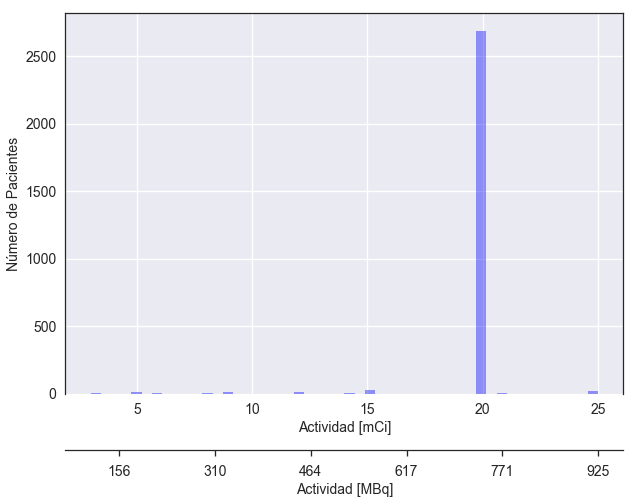

In [18]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(TC['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(TC['Actdosi'].min(),TC['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

## $\color{red}{\text{FDG}}$

In [19]:
FDG=dat_group_exam.get_group('FDG')

In [20]:
FDG['Actdosi'].max()

15.0

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


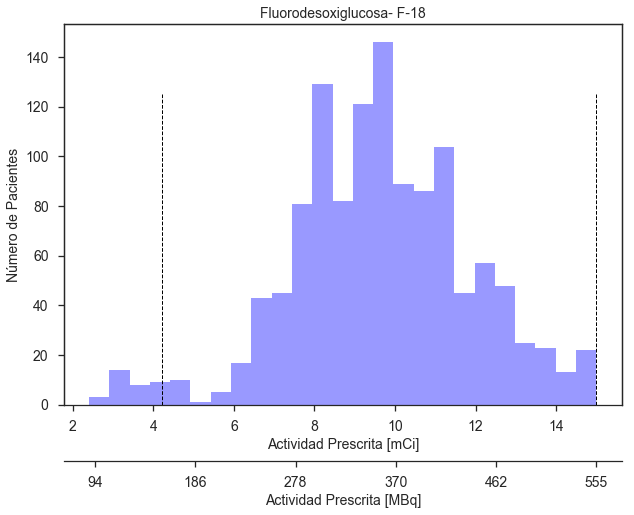

In [21]:
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(FDG['Actdosi'],kde=False,color='b',ax=ax1)
plt.plot((15, 15),(0,125), '--k', linewidth=1) 
plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Prescrita [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(FDG['Actdosi'].min(),FDG['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Prescrita [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('fdgrf.pdf',bbox_inches = "tight")

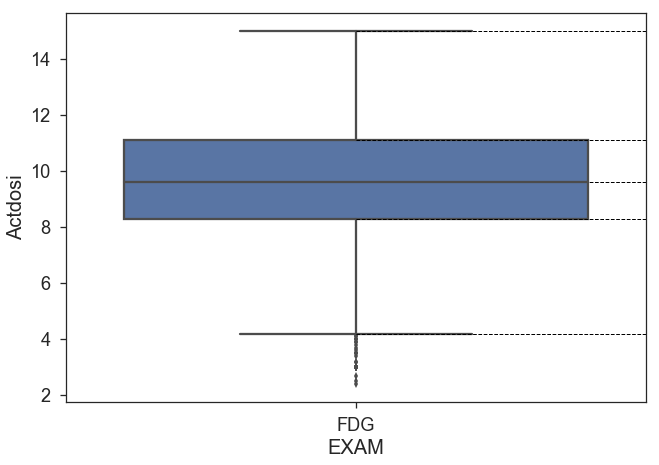

In [22]:
sns.boxplot(x="EXAM", y="Actdosi", data=FDG)

plt.plot((0,125),(4.2, 4.2), '--k', linewidth=1) 
plt.plot((0,125),(8.3, 8.3), '--k', linewidth=1) 
plt.plot((0,125),(9.6, 9.6), '--k', linewidth=1)
plt.plot((0,125),(11.1, 11.1), '--k', linewidth=1)
plt.plot((0,125),(15, 15), '--k', linewidth=1)

In [23]:
FDG['Actdosi'].describe()

count    1226.000000
mean        9.632113
std         2.236187
min         2.400000
25%         8.300000
50%         9.600000
75%        11.100000
max        15.000000
Name: Actdosi, dtype: float64

## $\color{red}{\text{Ga-Dota}}$

In [24]:
GADOTA =dat_group_exam.get_group('GADOTA')

In [25]:
GADOTA['Actdosi'].max()

5.5

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


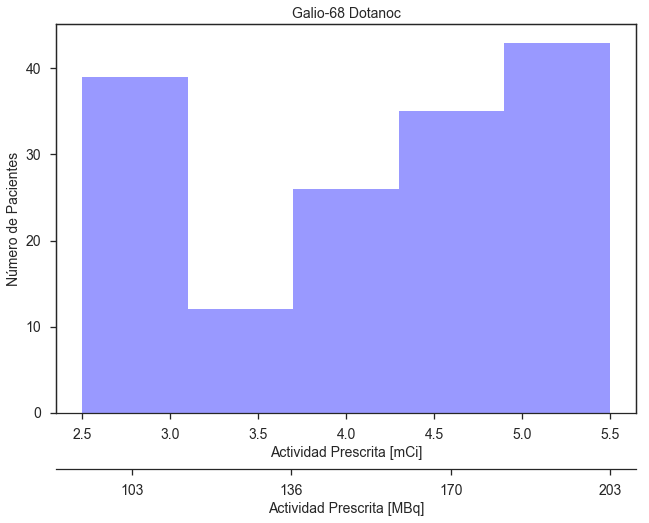

In [26]:
### Plot the data
ax1=plt.subplot(1,1,1)
sns.distplot(GADOTA['Actdosi'],kde=False,color='b',ax=ax1)

ax1.set_title('Galio-68 Dotanoc',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Prescrita [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')
## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(GADOTA['Actdosi'].min(),GADOTA['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Prescrita [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('gadotadosi.pdf',bbox_inches = "tight")

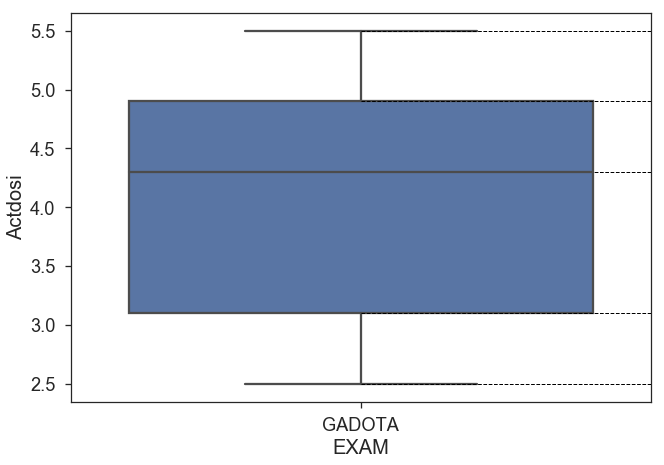

In [27]:
sns.boxplot(x="EXAM", y="Actdosi", data=GADOTA)

plt.plot((0,125),(2.5, 2.5), '--k', linewidth=1) 
plt.plot((0,125),(3.1, 3.1), '--k', linewidth=1) 
plt.plot((0,125),(4.3, 4.3), '--k', linewidth=1)
plt.plot((0,125),(4.9, 4.9), '--k', linewidth=1)
plt.plot((0,125),(5.5, 5.5), '--k', linewidth=1)

In [28]:
GADOTA['Actdosi'].describe()

count    155.000000
mean       4.186452
std        0.933161
min        2.500000
25%        3.100000
50%        4.300000
75%        4.900000
max        5.500000
Name: Actdosi, dtype: float64

## $\color{red}{\text{Ga-PSMA}}$

In [29]:
GAPSMA =dat_group_exam.get_group('GAPSMA')

In [30]:
GAPSMA['Actdosi'].max()

5.5

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


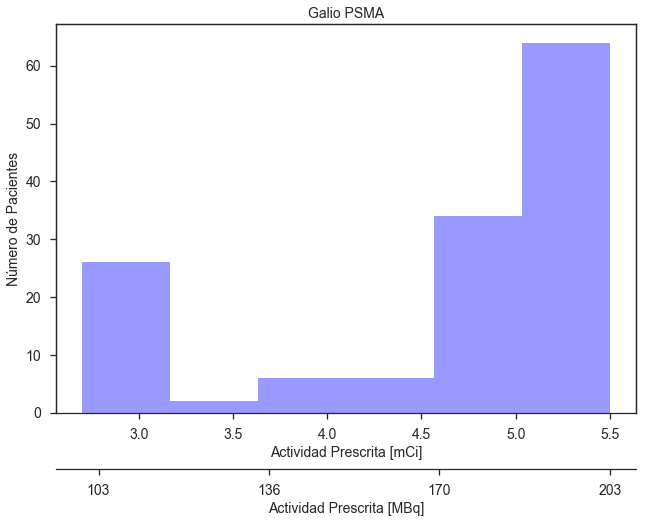

In [31]:
### Plot the data
ax1=plt.subplot(1,1,1)
sns.distplot(GAPSMA['Actdosi'],kde=False,color='b',ax=ax1)

ax1.set_title('Galio PSMA',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Prescrita [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')
## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(GAPSMA['Actdosi'].min(),GAPSMA['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Prescrita [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('gapsmapres.pdf',bbox_inches = "tight")

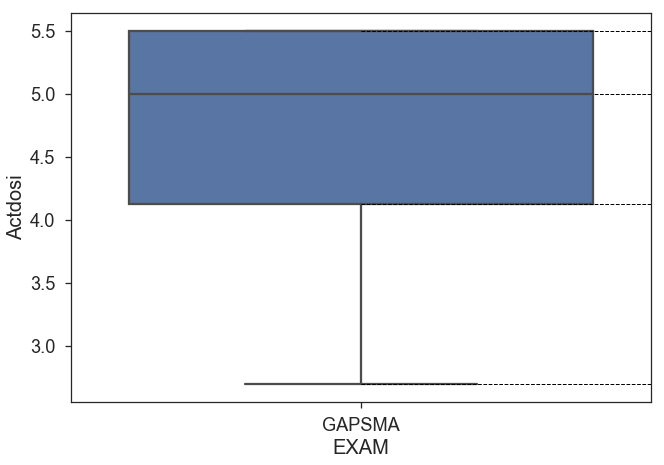

In [32]:
sns.boxplot(x="EXAM", y="Actdosi", data=GAPSMA)

plt.plot((0,125),(2.7, 2.7), '--k', linewidth=1) 
plt.plot((0,125),(4.13, 4.13), '--k', linewidth=1) 
plt.plot((0,125),(5.0, 5.0), '--k', linewidth=1)
#plt.plot((0,125),(4.9, 4.9), '--k', linewidth=1)
plt.plot((0,125),(5.5, 5.5), '--k', linewidth=1)

In [33]:
GAPSMA['Actdosi'].describe()

count    138.000000
mean       4.692029
std        0.949534
min        2.700000
25%        4.125000
50%        5.000000
75%        5.500000
max        5.500000
Name: Actdosi, dtype: float64

## Missing Values

Eliminar los valores faltantes a lo largo de las columnas "ActAdm", "Actdosi" y "Vol"

In [34]:
missing_data = data.isnull()
#missing_data.head(5)

### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [35]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

RF
False    1013
Name: RF, dtype: int64

EXAM
False    1013
Name: EXAM, dtype: int64

ActAdm
False    1013
Name: ActAdm, dtype: int64

Actdosi
False    1013
Name: Actdosi, dtype: int64

Vol
False    1012
True        1
Name: Vol, dtype: int64



### Deal with missing data
Drop the whole row

In [36]:
# simply drop whole row with NaN in "Vol" column
data.dropna(subset=["Vol"], axis=0, inplace=True)

# reset index, because we droped one row
data.reset_index(drop=True, inplace=True)

In [37]:
#data.head()

## $\color{blue}{\text{Actividad especifica}}$

In [38]:
especifica=data["Actdosi"]/data["Vol"]
data['Esp']= especifica

In [39]:
#data.head()

## $\color{blue}{\text{Agrupar por Examen }}$ 

In [40]:
data_group_exam = data.groupby(['EXAM'],as_index=False)
data_group_rf = data.groupby(['RF'],as_index=False)

### Mediana-percentil 50 

In [41]:
#data_group_exam.median()

### Minimo

In [42]:
#data_group_exam.min()

### Máximo

In [43]:
#data_group_exam.max()

### Desviación Estandar

In [44]:
#data_group_exam.std()

In [45]:
## Variables Categóricas
##Datos de tecneciados corresponden al mes de Enero de 2019. Datos de FDG corresponden a Enero-27 Junio de 2019. Datos Ga DOTA de Enero-Octubre de 2019. 
#Datos de Ga PSMA de Enero-Octubre de 2019
#dat_group_rf = dat.groupby(['RF'],as_index=False).sum()
#dat_group_rf
######Conteo de variables categoricas
####GROUP BY in Python 
#data_test =dat[['RF','EXAM']]
#data["RF"].value_counts()
#sns.countplot(y="RF", data=data,orient="h",color="c")
######Conteo de variables categoricas
#data["EXAM"].value_counts()
#sns.countplot(y="EXAM", data=data,orient="h",color="c")
#plt.bar(dat_group_rf['RF'],dat_group_rf['Vol'])
#dat_group_exam = dat.groupby(['EXAM'],as_index=False).sum()
#dat_group_exam
#plt.bar(dat_group_exam['EXAM'],dat_group_exam['Vol'])

Filtrando datos por Radiofarmaco : Tc-99m(Tc), F-18(F), Ga-68 PSMA(GaPSMA) y Ga-68 DOTA(GaDOTA). 

## Variables Númericas 

## $\color{red}{\text{Tc-99m}}$

In [46]:
######################################### Tc-99m ##############################################
#Tecnecio = ['Tc']
#data_Tc =data[data.RF.isin(Tecnecio)]
#data_Tc.shape

data_Tc=data_group_exam.get_group('MDP')

In [79]:
data_Tc.head()

,RF,EXAM,ActAdm,Actdosi,Vol,Esp
0,Tc,MDP,20.0,20.9,0.30,69.666667
1,Tc,MDP,20.0,20.8,0.35,59.428571
2,Tc,MDP,20.0,21.0,0.40,52.500000
3,Tc,MDP,20.0,21.0,0.40,52.500000
4,Tc,MDP,20.0,22.0,0.40,55.000000


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


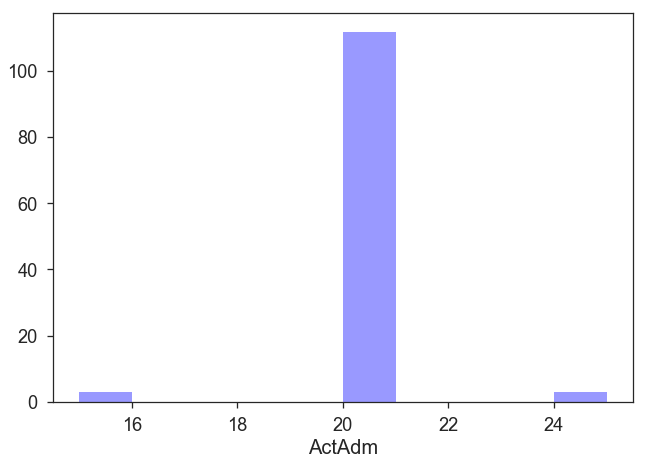

In [48]:
sns.distplot(data_Tc['ActAdm'],kde=False,color='b')
#sns.boxplot(x="EXAM", y="Actdosi", data=data_Tc)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


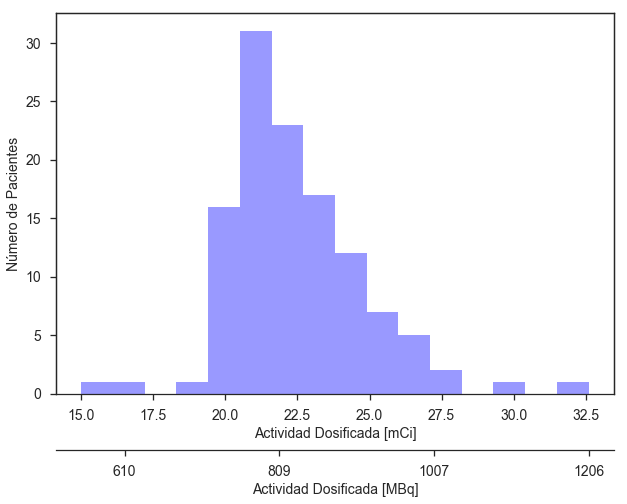

In [49]:
#sns.distplot(data_Tc['Actdosi'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Tc['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Dosificada [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Tc['Actdosi'].min(),data_Tc['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Dosificada [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('tcMDP.pdf',bbox_inches = "tight")

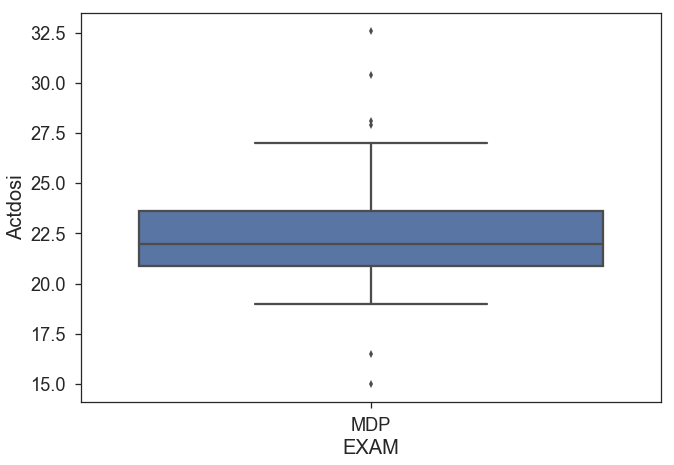

In [80]:
sns.boxplot(x="EXAM", y="Actdosi", data=data_Tc)

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


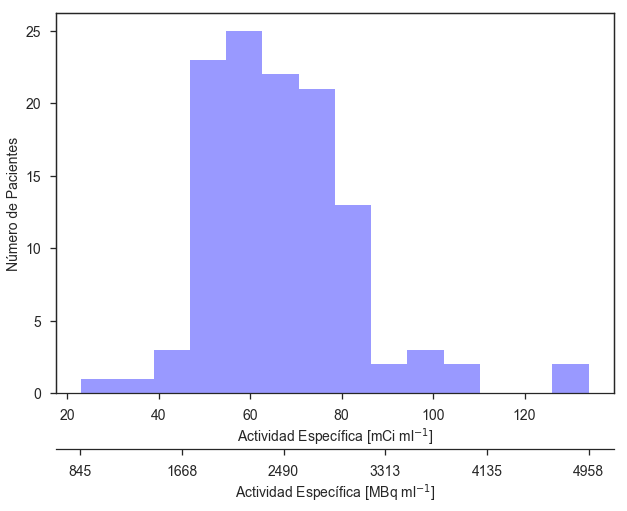

In [50]:
#sns.distplot(data_Tc['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Tc['Esp'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Específica [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Tc['Esp'].min(),data_Tc['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Específica [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('tcMDPesp.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


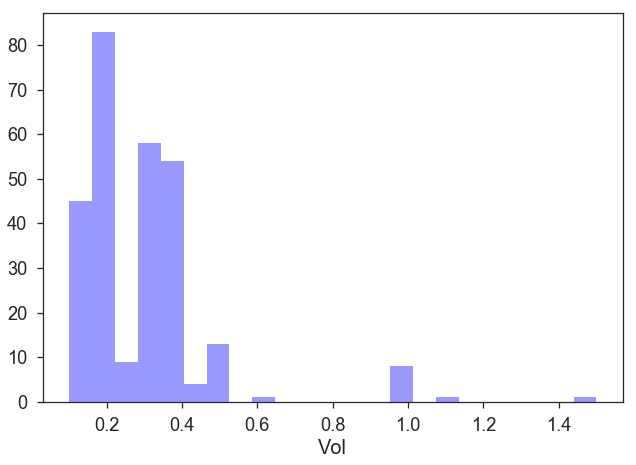

In [51]:
data_Tcg= data_group_rf.get_group('Tc')
sns.distplot(data_Tcg['Vol'],kde=False,color='b')

In [52]:
data_Tcg.describe()
#sns.distplot(data_Tc['Esp'],kde=False,color='b')

,ActAdm,Actdosi,Vol,Esp
count,277.000000,277.000000,277.000000,277.000000
mean,15.843863,17.679242,0.297942,70.174913
std,7.416946,8.487197,0.185339,50.011571
min,0.250000,0.210000,0.100000,2.100000
25%,15.000000,19.000000,0.200000,22.700000
50%,20.000000,21.300000,0.300000,62.222222
75%,20.000000,23.000000,0.400000,97.600000
max,25.000000,32.600000,1.500000,238.000000


In [53]:
data_Tc.describe()
#MDP =data_group_exam.get_group('MDP')

,ActAdm,Actdosi,Vol,Esp
count,118.000000,118.000000,118.000000,118.000000
mean,20.000000,22.417119,0.353983,67.184806
std,1.132277,2.436212,0.104408,16.646655
min,15.000000,15.000000,0.150000,23.090909
25%,20.000000,20.900000,0.300000,55.000000
50%,20.000000,22.000000,0.350000,66.666667
75%,20.000000,23.600000,0.400000,75.500000
max,25.000000,32.600000,1.100000,134.000000


In [54]:
#MDP.std()

In [55]:
#sns.distplot(MDP['Actdosi'],kde=False,color='b')

In [56]:
#VENTRI =data_group_exam.get_group('VENTRI')

In [57]:
#VENTRI.std()

In [58]:
#sns.distplot(VENTRI['Vol'],kde=False,color='b')

## $\color{red}{\text{F-18}}$

In [59]:
######################################### F-18 ##############################################
#Fluor = ['F']
#data_F =data[data.RF.isin(Fluor)]
#data_F.shape

data_F=data_group_rf.get_group('F')
#data_F.head()

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


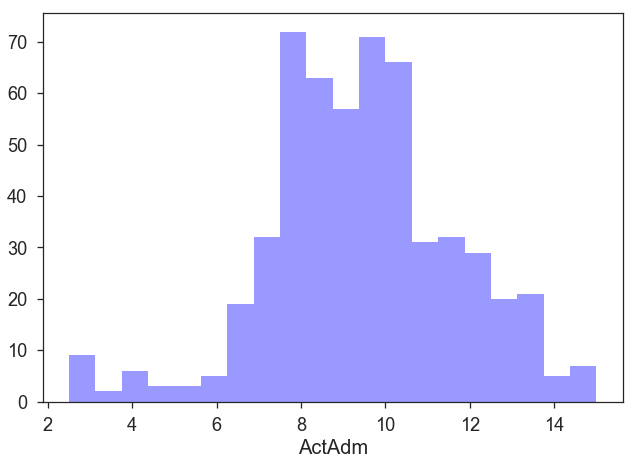

In [60]:
#sns.boxplot(x="EXAM", y="Actdosi", data=data_F)
sns.distplot(data_F['ActAdm'],kde=False,color='b')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


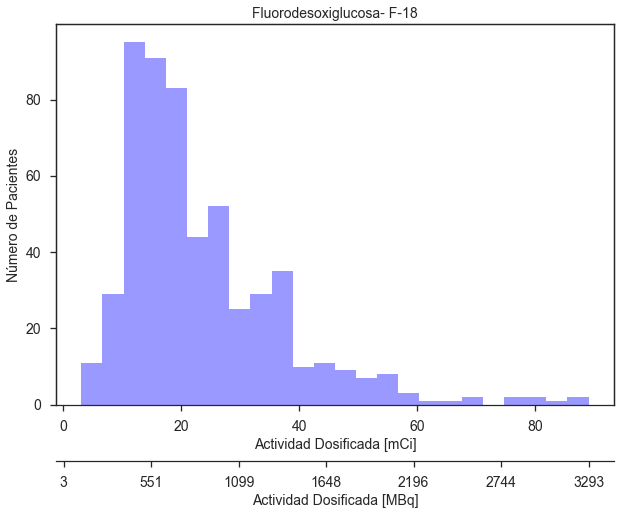

In [61]:
#data_F.describe()
#sns.distplot(data_F['Actdosi'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_F['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Dosificada [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_F['Actdosi'].min(),data_F['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Dosificada [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('FDGdo.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


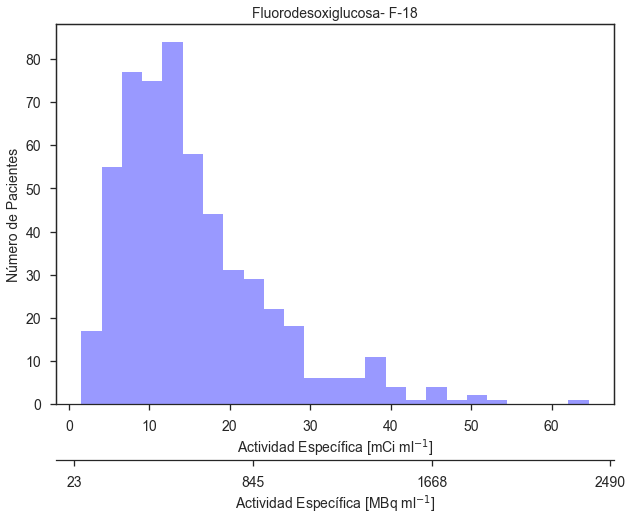

In [62]:
#sns.distplot(data_F['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_F['Esp'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Específica [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Tc['Esp'].min(),data_Tc['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Específica [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('FDGesp.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


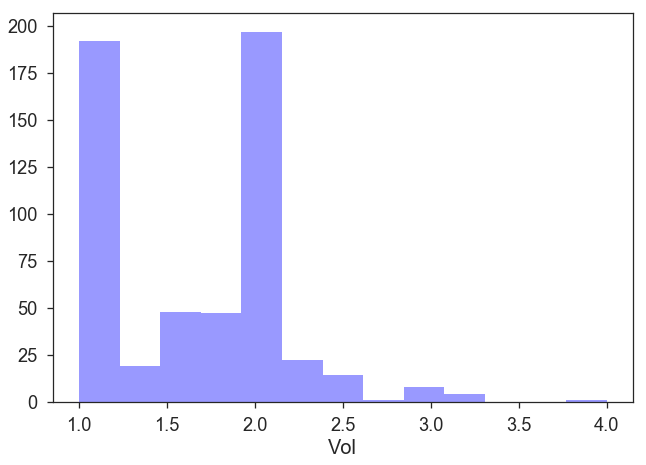

In [63]:
#sns.distplot(data_F['Esp'],kde=False,color='b')
#plt.title('F-18 FDG')
#plt.xlabel('Actividad Especifica [mCi/mL]')
#plt.ylabel('Número de Pacientes')
data_Fg= data_group_rf.get_group('F')
sns.distplot(data_Fg['Vol'],kde=False,color='b')

In [64]:
data_F.describe()
#sns.distplot(data_F['ActAdm'],kde=False,color='b')
#plt.title('F-18 FDG')
#plt.xlabel('Actividad Administrada [mCi]')
#plt.ylabel('Número de Pacientes')

,ActAdm,Actdosi,Vol,Esp
count,553.000000,553.000000,553.000000,553.000000
mean,9.445136,23.434521,1.635805,15.460020
std,2.222082,13.625090,0.523075,9.334624
min,2.500000,3.060000,1.000000,1.530000
25%,8.100000,14.000000,1.000000,8.888889
50%,9.500000,19.300000,1.800000,13.100000
75%,10.800000,29.000000,2.000000,19.500000
max,15.000000,89.000000,4.000000,64.600000


## $\color{red}{\text{Ga-68}}$

In [65]:
######################################### Ga-68 DOTATOC ##############################################
data_Gado=data_group_exam.get_group('GADOTA')
#data_Gado.head()

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


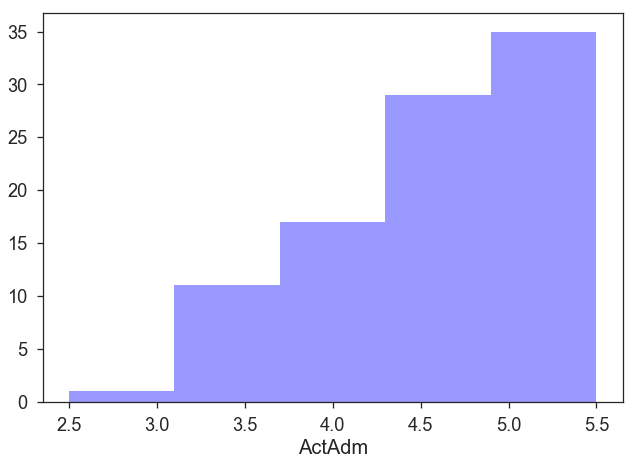

In [66]:
sns.distplot(data_Gado['ActAdm'],kde=False,color='b')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


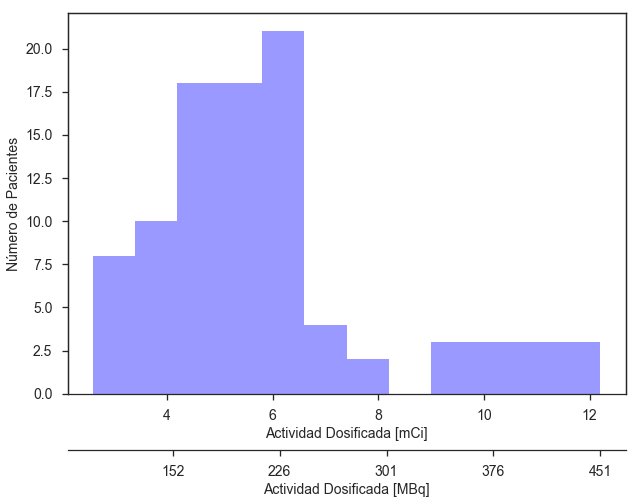

In [67]:
#sns.distplot(data_Gado['Actdosi'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Gado['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Dosificada [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Gado['Actdosi'].min(),data_Gado['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Dosificada [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('GADOdosi.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


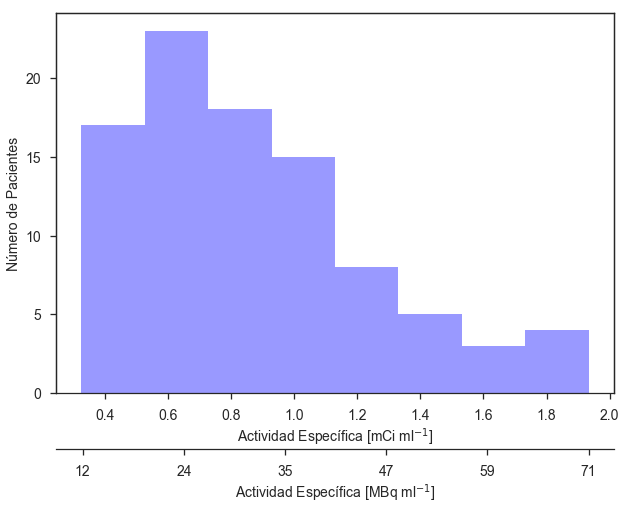

In [68]:
#sns.distplot(data_Gado['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Gado['Esp'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Específica [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Gado['Esp'].min(),data_Gado['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Específica [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('GADOesp.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


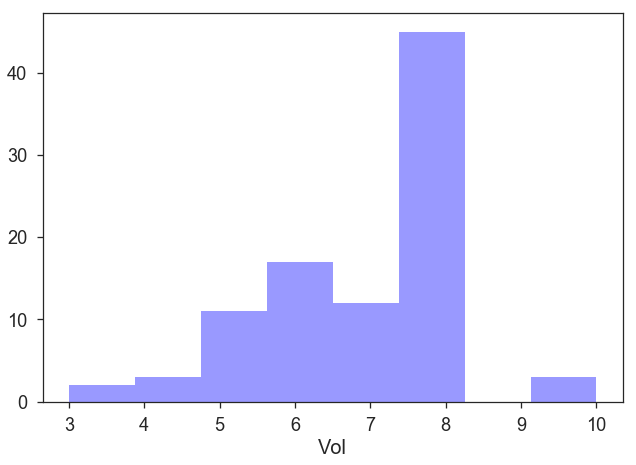

In [69]:
sns.distplot(data_Gado['Vol'],kde=False,color='b')

In [70]:
data_Gado.describe()

,ActAdm,Actdosi,Vol,Esp
count,93.000000,93.000000,93.000000,93.000000
mean,4.594624,5.797957,6.917204,0.881372
std,0.736526,2.170093,1.366018,0.380747
min,2.500000,2.600000,3.000000,0.325000
25%,4.100000,4.400000,6.000000,0.603750
50%,4.600000,5.490000,7.500000,0.813333
75%,5.500000,6.300000,8.000000,1.083333
max,5.500000,12.200000,10.000000,1.933333


/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


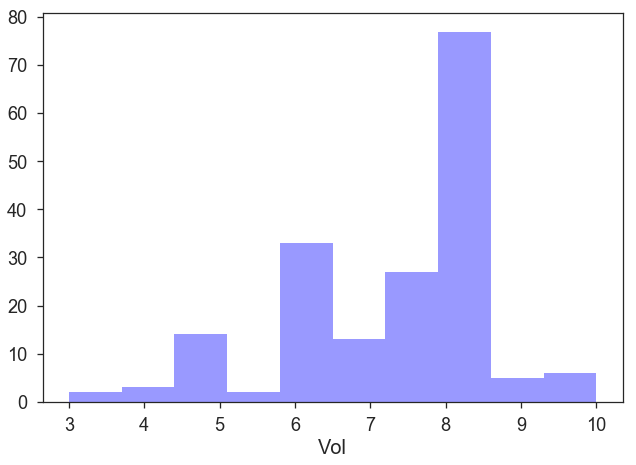

In [71]:
############ GALIO 68 ##############
data_Gag= data_group_rf.get_group('Ga')
sns.distplot(data_Gag['Vol'],kde=False,color='b')

In [72]:
data_Gag.describe()

,ActAdm,Actdosi,Vol,Esp
count,182.000000,182.000000,182.000000,182.000000
mean,4.846154,5.801099,7.190110,0.841385
std,0.670748,2.000613,1.293892,0.345606
min,2.500000,2.600000,3.000000,0.325000
25%,4.425000,4.500000,6.000000,0.589063
50%,4.900000,5.495000,7.500000,0.735417
75%,5.500000,6.375000,8.000000,1.000000
max,5.500000,14.000000,10.000000,2.333333


In [73]:
#########################################################################################################
######################################## Ga-68 PSMA #####################################################
#########################################################################################################
data_Gapsma=data_group_exam.get_group('GAPSMA')
#data_Gapsma.head()

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


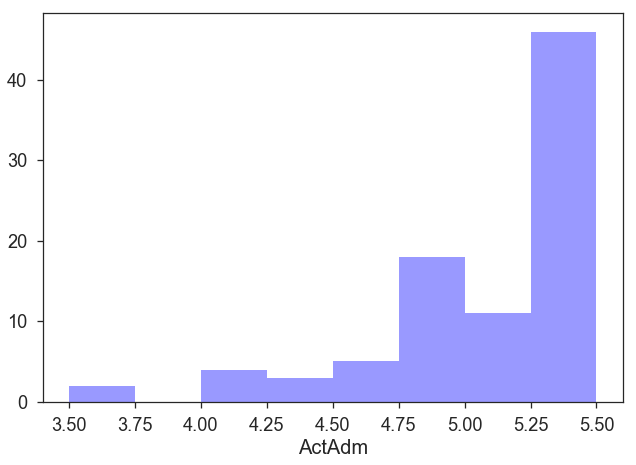

In [74]:
sns.distplot(data_Gapsma['ActAdm'],kde=False,color='b')

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


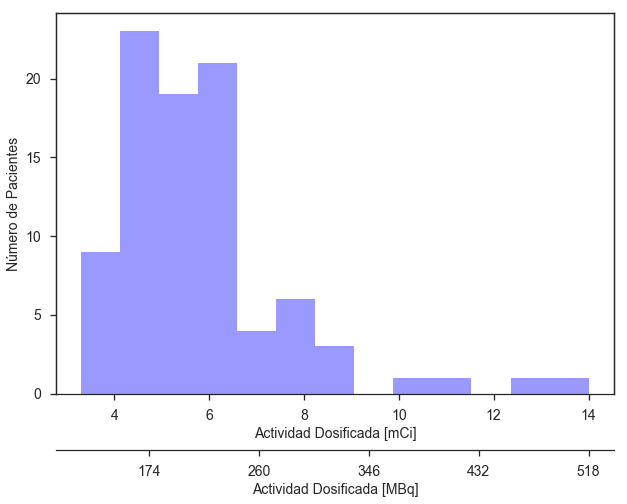

In [75]:
#sns.distplot(data_Gapsma['Actdosi'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Gapsma['Actdosi'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Dosificada [mCi]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Gapsma['Actdosi'].min(),data_Gapsma['Actdosi'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Dosificada [MBq]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('GAPSMAdosi.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


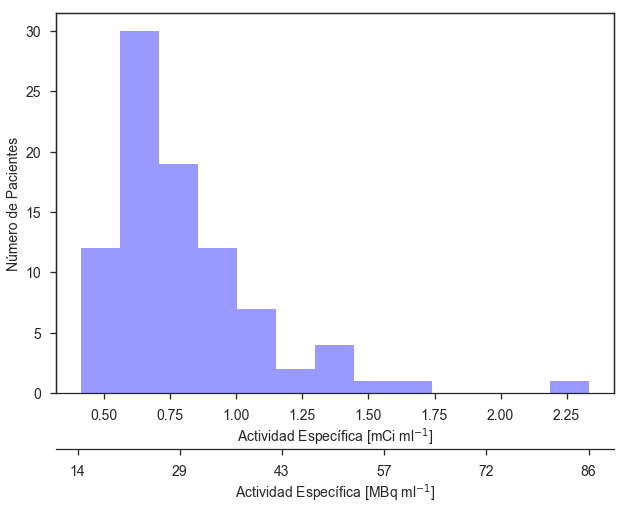

In [76]:
#sns.distplot(data_Gapsma['Esp'],kde=False,color='b')
### Plot the data
plt.figure(figsize=(10,7))
ax1=plt.subplot(1,1,1)
sns.distplot(data_Gapsma['Esp'],kde=False,color='b',ax=ax1)
#plt.plot((15, 15),(0,125), '--k', linewidth=1) 
#plt.plot((4.2, 4.2),(0,125), '--k', linewidth=1) 

#ax1.set_title('Fluorodesoxiglucosa- F-18',fontsize=14)
ax1.set_ylabel('Número de Pacientes',fontsize=14)
ax1.set_xlabel('Actividad Específica [mCi ml$^{-1}$]',fontsize=14)
ax1.tick_params(axis='both',labelsize=14)
sns.set_style('ticks')

## Set second x-axis for MBq
ax2 = ax1.twiny()
MBqs = np.linspace(data_Gapsma['Esp'].min(),data_Gapsma['Esp'].max()*37,7) # Actividad en MBq
ax2.set_xticks(MBqs/37) # Ponga los ticks
ax2.set_xticklabels(MBqs.astype(int)) # Ponga los Labels
ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 56))
ax2.set_xlabel('Actividad Específica [MBq ml$^{-1}$]',fontsize=14)
ax2.set_xlim(ax1.get_xlim())
ax2.tick_params(labelsize=14)

plt.savefig('GAPSMAesp.pdf',bbox_inches = "tight")

/Users/Mila/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


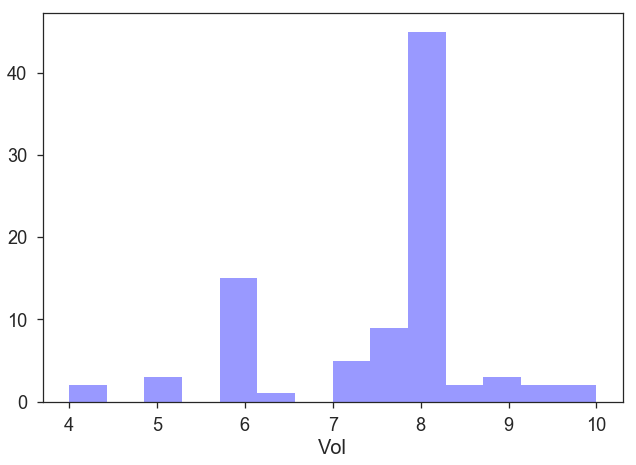

In [77]:
sns.distplot(data_Gapsma['Vol'],kde=False,color='b')

In [78]:
data_Gapsma.describe()

,ActAdm,Actdosi,Vol,Esp
count,89.000000,89.000000,89.000000,89.000000
mean,5.108989,5.804382,7.475281,0.799600
std,0.470648,1.819047,1.153973,0.301098
min,3.500000,3.300000,4.000000,0.412500
25%,4.900000,4.600000,7.000000,0.587500
50%,5.300000,5.500000,8.000000,0.716667
75%,5.500000,6.500000,8.000000,0.921875
max,5.500000,14.000000,10.000000,2.333333
